In [1]:
import numpy as np
import pandas
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

Load pickle with 3D array of pixel values. `file.p` is generated from a test set and costs around 10GB of RAM? That can't be right...

In [2]:
with open('file.p','rb') as f:
    arr = pickle.load(f)

We can view a grayscale version of the canvas. Pixel values are arbitrary, but you can see patterns.

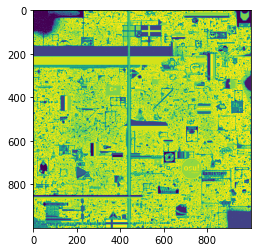

In [3]:
plt.imshow(arr[0])

Calculate the frame-by-frame changes in the array.

In [4]:
left = arr[:-1]
right = arr[1:]
diff = left-right

print(diff.shape)

(3021, 1000, 1000)


In [5]:
import gc
del arr

gc.collect()

5

Downsample those changes just to sparsify it.

In [6]:
sample = diff[::1]
sample.shape

(3021, 1000, 1000)

Get boolean "has changed" for each pixel in the matrix. Sum along the time dimension for total updates in this time sample. Not actually the number of user interactions but sort of similar. For some reason this is the one step that bloats up.

In [7]:
changes = sample != 0
n_updates = changes.sum(axis=0)
n_updates.shape

(1000, 1000)

In [8]:
print(changes.mean())

0.008929023833167826


The distribution of these counts is kinda bad though. Too many pixels that change very rarely.

1115.332388874439
26.974581
Percentiles: [   0.   10.   19.   34. 2460.]


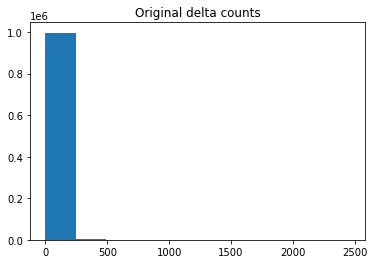

In [9]:
print(n_updates.var())
print(n_updates.mean())

plt.hist(n_updates.flatten())
plt.title("Original delta counts")
print("Percentiles:", np.quantile(n_updates, [0,.25,.5,.75,1]))
plt.show()

Want to normalize these values so they scale better.

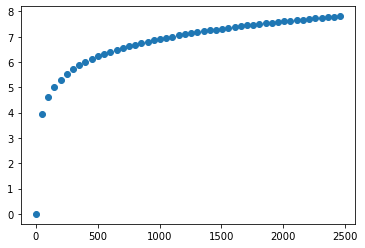

In [10]:
def normalizer(n, k=1):
    return np.log(n+k)

x = np.linspace(0,n_updates.max())
y = normalizer(x)

plt.scatter(x,y)

Here's the distribution after normalizing:

In [11]:
norm_updates = normalizer(n_updates, k=5)

Percentiles: [1.60943791 2.7080502  3.17805383 3.66356165 7.80994709]


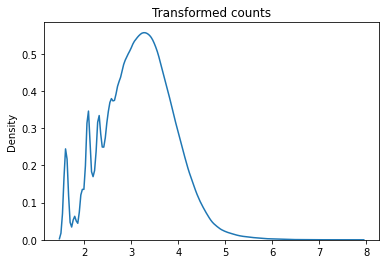

In [12]:
sns.kdeplot(norm_updates.flatten())
plt.title("Transformed counts")
print("Percentiles:", np.quantile(norm_updates, [0,.25,.5,.75,1]))

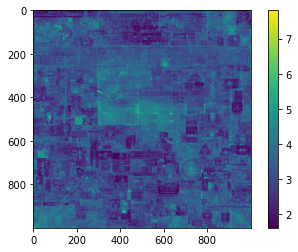

In [13]:
plt.imshow(norm_updates)
plt.colorbar()
plt.show()

In [18]:
np.savetxt("data/compiled/n_updates_3022.csv", n_updates.astype(int), delimiter=',', fmt='%.0f')
np.savetxt("data/compiled/norm_updates_3022.csv", norm_updates, delimiter=',', fmt='%.4f')

In [15]:
n_updates.shape
overtime = diff.sum(axis=2).sum(axis=1)
